In [24]:
import os

import geopandas as gpd
import pandas as pd
from dbfread import DBF

import matplotlib.pyplot as plt


DATA_PATH = "./raw/"
assert os.path.exists(DATA_PATH)

vulnrb_shp = f"{DATA_PATH}/VULNRB_IPMxMZ.shp"
vulnrb_dbf = f"{DATA_PATH}/VULNRB_IPMxMZ.dbf"
vulnrb_prj = f"{DATA_PATH}/VULNRB_IPMxMZ.prj"
vulnrb_cpg = f"{DATA_PATH}/VULNRB_IPMxMZ.cpg"
vulnrb_shx = f"{DATA_PATH}/VULNRB_IPMxMZ.shx"

## Archivo .shp

In [5]:
shp = gpd.read_file(vulnrb_shp)
shp

,COD_DPTO,COD_MPIO,COD_DANE,CATEGORIA,LABEL,ipm,embarazo_a,reactivaci,geometry
0,05,05001,0500110000000001010101,5.0,Vulnerabilidad baja,39.4,Vulnerabilidad media-alta,elegibilidad media-baja,"POLYGON ((-75.54267 6.30182, -75.54262 6.30175..."
1,05,05001,0500110000000001010104,5.0,Vulnerabilidad baja,25.9,Vulnerabilidad media-alta,elegibilidad media,"POLYGON ((-75.54237 6.29968, -75.54235 6.29965..."
2,05,05001,0500110000000001010105,2.0,Vulnerabilidad media-baja,14.1,Vulnerabilidad media-baja,elegibilidad media,"POLYGON ((-75.5428 6.29964, -75.54277 6.29959,..."
3,05,05001,0500110000000001010108,2.0,Vulnerabilidad media-baja,26.8,Vulnerabilidad media-baja,elegibilidad media,"POLYGON ((-75.54386 6.29974, -75.54386 6.29975..."
4,05,05001,0500110000000001010110,5.0,Vulnerabilidad baja,42.2,Vulnerabilidad baja,elegibilidad media-baja,"POLYGON ((-75.54369 6.30214, -75.54369 6.30213..."
...,...,...,...,...,...,...,...,...,...
504991,99,99773,9977320030102700010102,0.0,None,0.0,None,None,"POLYGON ((-69.85155 4.33427, -69.85149 4.33427..."
504992,99,99773,9977320030102700010103,0.0,None,0.0,None,None,"POLYGON ((-69.85227 4.33365, -69.85257 4.3337,..."
504993,99,99773,9977320030102700010104,0.0,None,0.0,None,None,"POLYGON ((-69.85276 4.33338, -69.85274 4.3336,..."
504994,99,99773,9977320030102700010105,0.0,None,0.0,None,None,"POLYGON ((-69.85313 4.33348, -69.85311 4.33368..."


## Archivo .dbf

In [6]:
table = DBF(vulnrb_dbf, load=True)
dbf = pd.DataFrame(iter(table))

dbf

,COD_DPTO,COD_MPIO,COD_DANE,CATEGORIA,LABEL,ipm,embarazo_a,reactivaci
0,05,05001,0500110000000001010101,5.0,Vulnerabilidad baja,39.4,Vulnerabilidad media-alta,elegibilidad media-baja
1,05,05001,0500110000000001010104,5.0,Vulnerabilidad baja,25.9,Vulnerabilidad media-alta,elegibilidad media
2,05,05001,0500110000000001010105,2.0,Vulnerabilidad media-baja,14.1,Vulnerabilidad media-baja,elegibilidad media
3,05,05001,0500110000000001010108,2.0,Vulnerabilidad media-baja,26.8,Vulnerabilidad media-baja,elegibilidad media
4,05,05001,0500110000000001010110,5.0,Vulnerabilidad baja,42.2,Vulnerabilidad baja,elegibilidad media-baja
...,...,...,...,...,...,...,...,...
504991,99,99773,9977320030102700010102,0.0,,0.0,,
504992,99,99773,9977320030102700010103,0.0,,0.0,,
504993,99,99773,9977320030102700010104,0.0,,0.0,,
504994,99,99773,9977320030102700010105,0.0,,0.0,,


## Análisis exploratorio de los datos

Por lo que se ve, los datos son exactamente los mismos en el formato .dbf que en el .shp, así que usaré este último.

In [15]:
display(
    shp.info(),
    shp.isna().sum() / len(shp)
)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 504996 entries, 0 to 504995
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   COD_DPTO    504996 non-null  object  
 1   COD_MPIO    504996 non-null  object  
 2   COD_DANE    504996 non-null  object  
 3   CATEGORIA   504996 non-null  float64 
 4   LABEL       407277 non-null  object  
 5   ipm         504996 non-null  float64 
 6   embarazo_a  403916 non-null  object  
 7   reactivaci  371050 non-null  object  
 8   geometry    504996 non-null  geometry
dtypes: float64(2), geometry(1), object(6)
memory usage: 34.7+ MB


None

COD_DPTO      0.000000
COD_MPIO      0.000000
COD_DANE      0.000000
CATEGORIA     0.000000
LABEL         0.193505
ipm           0.000000
embarazo_a    0.200160
reactivaci    0.265242
geometry      0.000000
dtype: float64

In [18]:
cols = ["CATEGORIA", "LABEL", "ipm", "embarazo_a", "reactivaci"]
for col in cols:
    print(f"Valores únicos para {col}")
    print(f"{shp[col].unique()} - {len(shp[col].unique())}")
    print("\n")

Valores únicos para CATEGORIA
[5. 2. 4. 1. 3. 0.] - 6


Valores únicos para LABEL
['Vulnerabilidad baja' 'Vulnerabilidad media-baja'
 'Vulnerabilidad media-alta' 'Vulnerabilidad alta' 'Vulnerabilidad media'
 None] - 6


Valores únicos para ipm
[39.4        25.9        14.1        ... 69.59064327 78.28746177
 86.22222222] - 14188


Valores únicos para embarazo_a
['Vulnerabilidad media-alta' 'Vulnerabilidad media-baja'
 'Vulnerabilidad baja' 'Vulnerabilidad media' 'Vulnerabilidad alta' None] - 6


Valores únicos para reactivaci
['elegibilidad media-baja' 'elegibilidad media' 'elegibilidad alta'
 'elegibilidad baja' None 'elegibilidad media-alta'] - 6




In [21]:
shp[["LABEL", "CATEGORIA"]].drop_duplicates()

,LABEL,CATEGORIA
0,Vulnerabilidad baja,5.0
2,Vulnerabilidad media-baja,2.0
8,Vulnerabilidad media-alta,4.0
13,Vulnerabilidad alta,1.0
890,Vulnerabilidad media,3.0
13973,Vulnerabilidad baja,1.0
13974,Vulnerabilidad alta,2.0
14111,Vulnerabilidad baja,2.0
14443,None,0.0
14976,Vulnerabilidad baja,3.0


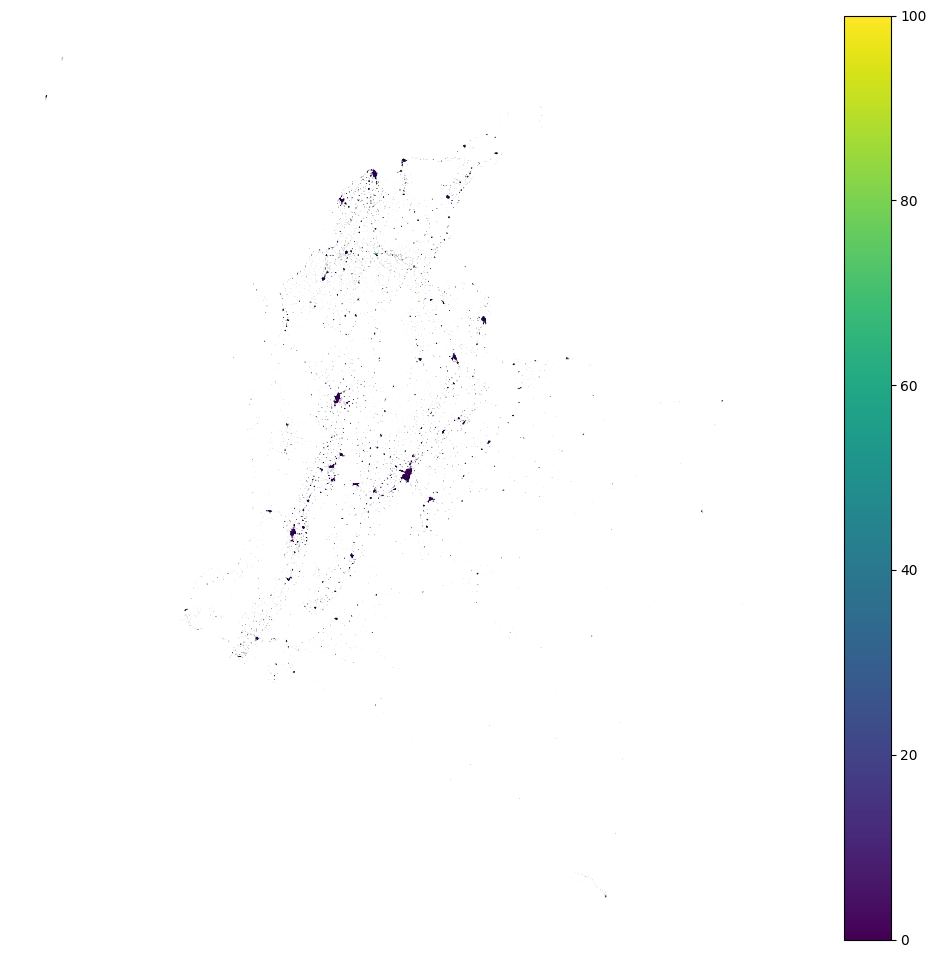

In [26]:
fig, ax = plt.subplots(figsize=(16, 12))
shp.plot(ax=ax, column="ipm", categorical=False, cmap='viridis', legend=True)

ax.set_axis_off()
plt.show()